In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
from scipy.stats import gaussian_kde

import riskDualObserverSeperate as model
import tools as tools


In [ ]:
type = "linearIncrease"
line_frac = 0.0

In [ ]:
theta0 = 10./90.*np.pi
kappa_s = 1000
kappa_r = 32
stim_val_grid, val_input = model.input_to_val_system(theta0, kappa_s, kappa_r, type)

plt.plot(val_input[0])


In [ ]:
type = "linearIncrease"

p_mVal_given_theta0, p_mVal_given_val = model.value_efficient_encoding(29./90.*np.pi, 1000, 32, 0.07, type)

# p_m_given_theta[np.argsort(tools.value_function_ori(tools.stim_ori_grid, type))]

# plt.plot(model.rep_val_grid, p_mVal_given_theta0[0])

plt.plot(model.rep_val_grid, p_mVal_given_val[100])

plt.ylabel("P(representation/V0)")
plt.xlabel("Value")
plt.title("encoded distribution", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")



In [ ]:

theta0 = 80/90.*np.pi
kappa_s = 1000
kappa_r = 32
sigma_rep = np.sqrt(tools.factor_val/16) # The division is with teh analog of kappa

risk_prob = 0.75
type = "linearIncrease"

theta1 = float(tools.inverse_monotonic(tools.value_function_ori(theta0, type)/risk_prob, type))

safe_value, safe_prob = model.value_bayesian_decoding(theta0, kappa_s, kappa_r, sigma_rep, type)
rr, risky_prob = model.risky_value_dist(theta1, kappa_s, kappa_r, sigma_rep, risk_prob, type)

plt.plot(safe_value, safe_prob[0])
plt.plot(rr, risky_prob[0])

p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
print(p_chose_risky)

plt.xlabel("Value")
plt.ylabel("P(V)")
plt.title("Value mapping context 1", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")


In [ ]:
abs(trapezoid(safe_prob[0], safe_value, axis = -1))

# risk simulations

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns




# sns.set_context('talk|')?
import scipy.stats as ss
import math
from scipy.integrate import simpson, trapezoid
import numpy as np

import scipy.interpolate as interpolate
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from scipy import integrate
import scipy.stats as ss

import riskDualObserverSeperate as model
import tools as tools

In [ ]:
# setting parameters
experimentEffects = "00to180"#"00to45"
risk_prob = 0.75
type = "linearIncrease" 

stim_noise = 10000
rep_ori_noise = 32
rep_val_noise = np.sqrt(tools.factor_val/8)
start = 60/90*np.pi

# Getting all the values from actual transformation
interval = 70/90.*np.pi
if (type=="prior" or type=="linearDecrease" or type=="curvedPrior"):
    rangeOri = np.linspace(start, (start-interval), 100)
else:
    rangeOri = np.linspace(start, (start+interval), 100)

val_range = tools.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], stim_noise, rep_ori_noise, rep_val_noise, type)
risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_ori_noise, rep_val_noise, risk_prob, type)


# # Risk attitudes 
p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
# plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)



# comparing models : same noise regimes fopr safe and risky option

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns




# sns.set_context('talk|')?
import scipy.stats as ss
import math
from scipy.integrate import simpson, trapezoid
import numpy as np

import scipy.interpolate as interpolate
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from scipy import integrate
import scipy.stats as ss

import riskDualObserverSeperate as model
import tools as tools

In [2]:
def rnp_across_safeVals(stim_noise, rep_ori_noise, rep_val_noise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:])-1
    start = int(experimentEffects[0:2])+1
    end = end/90.*np.pi
    start = start/90.*np.pi
    
    if (type=="prior" or type=="curvedPrior" or type =="linearDecrease"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start, type)/1.5, type))
        safe_angles =  np.linspace(end, start_safe, int((end*90/np.pi-start_safe*90/np.pi+1)/3))
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end, type)/1.5, type))
        safe_angles =  np.linspace(start, end_safe, int((start*90/np.pi+end_safe*90/np.pi-1)/3))
    
    # print("safe angles - ",safe_angles)
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
        if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval), 20)
        else:
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval), 20)

        # print("range - ", rangeOri)
        # print("interval - ",interval)

        safeVal = float(tools.value_function_ori(safe_angles[i], type))
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, rep_ori_noise, rep_val_noise , type)
        rr, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_ori_noise, rep_val_noise, risk_prob, type)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        print("safe angle - ", safe_angles[i]*90./np.pi)
        # print(p_chose_risky[0,::2])
        rnp[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
        print(rnp[i])

    return safe_angles, safeVals, rnp



safe angle -  1.0
-7.776482540164632
safe angle -  4.125882352941177
0.0640243452472984
safe angle -  7.251764705882353
0.5641184915178017
safe angle -  10.377647058823527
0.6866800739342197
safe angle -  13.503529411764706
0.7278248532737011
safe angle -  16.629411764705882
0.7405487747854869
safe angle -  19.755294117647058
0.7450510729619881
safe angle -  22.881176470588237
0.7474730693745556
safe angle -  26.00705882352941
0.748783875383832
safe angle -  29.132941176470585
0.749293295035662
safe angle -  32.258823529411764
0.7492306378296296
safe angle -  35.38470588235294
0.7486141245631333
safe angle -  38.510588235294115
0.7477871750941588
safe angle -  41.63647058823529
0.746660767325043
safe angle -  44.76235294117647
0.7456146610421078
safe angle -  47.88823529411764
0.744631604344453
safe angle -  51.014117647058825
0.7441255574989717
safe angle -  54.13999999999999
0.7437037695726602
safe angle -  57.265882352941176
0.7436942011894421
safe angle -  60.391764705882345
0.7441

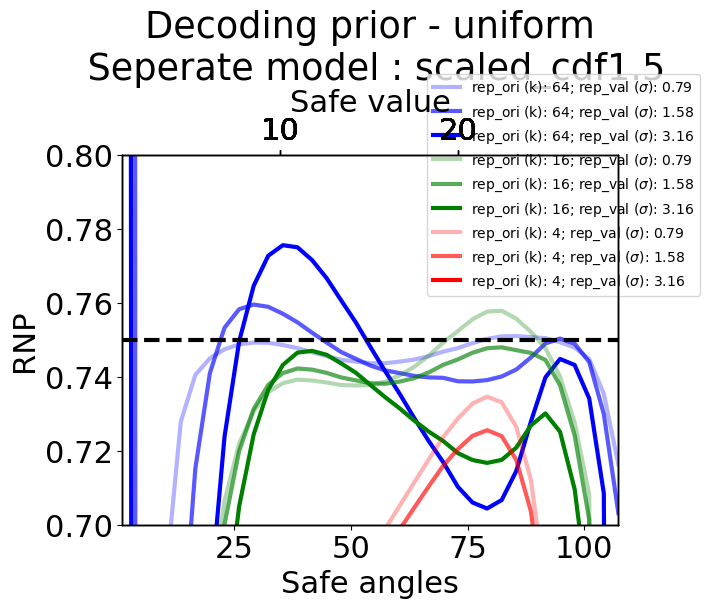

In [5]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
# type = "curved_cdf_prior" 
types = ["scaled_cdf"]

for type in types:

    # changeable parameters
    stim_list = [10000]
    rep_ori_list = [64, 16, 4]
    rep_val_list = [np.sqrt(tools.factor_val/64), np.sqrt(tools.factor_val/16), np.sqrt(tools.factor_val/4)]
    # high stim noise
    # stim_list = [64, 16]
    # rep_ori_list = [128]
    # rep_val_list = [np.sqrt(tools.factor_val/128)]


    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    alphaList = np.linspace(0.3, 1.0, len(rep_val_list))
    colorList = ["b", "g", "r", "c", "m", "y", "k"]
    j = -1
    for stim_noise in stim_list:
        for rep_ori_noise in rep_ori_list:
            j = j+1
            i = -1
            for rep_val_noise in rep_val_list:
                i = i+1
                safe_angles, safeVals, rnp = rnp_across_safeVals(stim_noise, rep_ori_noise, rep_val_noise, type, risk_prob, experimentEffects)
                ax1.set_ylim(0.7, 0.8)
                ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

                text = "rep_ori (k): "+str(round(rep_ori_noise,2))+"; rep_val ($\sigma$): "+str(round(rep_val_noise,2))
                ax1.plot(safe_angles[:]*90./np.pi, rnp[:], color=colorList[j], label = text, alpha =  alphaList[i])

                ax2 = ax1.twiny()
                if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
                    ax2.set_xlim(max(safeVals), min(safe_angles))

                ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

    ax1.axhline(risk_prob, c='k', ls='--')
    ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})

    ax2.set_xlabel("Safe value")
    ax1.set_xlabel("Safe angles")
    ax1.set_ylabel("RNP")

    if type == "scaled_cdf":
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n Seperate model : " + type+str(tools.scaling)) 
    else:
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n Seperate model : " + type) 

    plt.savefig("/Users/sbedi/Downloads/"+"sameNoise-seperate-"+type+".png",dpi=300, bbox_inches = "tight")
    


# Different noises for two options

In [ ]:
def rnp_diffNoises(stim_noise, safe_rep_ori_noise, risky_rep_ori_noise, safe_rep_val_noise, risky_rep_val_noise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:])-1
    start = int(experimentEffects[0:2])+1
    end = end/90.*np.pi
    start = start/90.*np.pi
    
    if (type=="prior" or type=="curvedPrior" or type =="linearDecrease"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start, type)/1.5, type))
        safe_angles =  np.linspace(end, start_safe, int((end*90/np.pi-start_safe*90/np.pi+1)/3))
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end, type)/1.5, type))
        safe_angles =  np.linspace(start, end_safe, int((start*90/np.pi+end_safe*90/np.pi-1)/3))
    
    # print("safe angles - ",safe_angles)
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
        if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval), 20)
        else:
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval), 20)

        # print("range - ", rangeOri*90/np.pi)
        # print("interval - ",interval)

        safeVal = float(tools.value_function_ori(safe_angles[i], type))
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        # print("safeval - ", safeVal, "range val - ", val_range)

        # getting inferred safe values for the two different noise types forthe two options
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, safe_rep_ori_noise, safe_rep_val_noise , type)
        rr, risky_prob = model.risky_value_dist((rangeOri), stim_noise, risky_rep_ori_noise, risky_rep_val_noise, risk_prob, type)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        print("safe angle - ", safe_angles[i]*90./np.pi)
        print(p_chose_risky[0,::2])
        rnp[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
        print(rnp[i])

    return safe_angles, safeVals, rnp



In [ ]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
types = ["cdf_prior"]
# type = "curved_cdf_prior"

for type in types:

    # changeable parameters
    stim_list = [10000]
    safe_ori_rep_list = [64, 16, 4]
    risky_ori_rep_list = [64, 16, 4]
    safe_val_rep_list = [64, 16, 4]
    risky_val_rep_list = [64, 16, 4]

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    alphaList = np.linspace(0.3, 1.0, len(risky_rep_list))
    alphaList = alphaList[np.argsort(risky_rep_list)][::-1]
    colorList = ["b", "g", "r", "c", "m", "y", "k"]
    j = -1
    for stim_noise in stim_list:
        for safe_rep_noise in safe_rep_list:
            j = j+1
            i = -1
            for risky_rep_noise in risky_rep_list:
                i = i+1
                safe_angles, safeVals, rnp = rnp_diffNoises(stim_noise, safe_rep_noise, risky_rep_noise, type, risk_prob, experimentEffects)
                ax1.set_ylim(0.7, 0.8)
                ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

                text = "safe_rep ($\kappa$): "+str(safe_rep_noise) + "; risky_rep ($\kappa$): "+str(risky_rep_noise)
                ax1.plot(safe_angles[:]*90./np.pi, rnp[:], color=colorList[j], label = text, alpha =  alphaList[i])

                ax2 = ax1.twiny()
                if (type=="prior" or type=="curvedPrior" or type == "linearDecrease"):
                    ax2.set_xlim(max(safeVals), min(safe_angles))

                ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

    ax1.axhline(risk_prob, c='k', ls='--')
    ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})

    ax2.set_xlabel("Safe value")
    ax1.set_xlabel("Safe angles")
    ax1.set_ylabel("RNP")
    if type == "scaled_cdf":
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n Perception model : " + type+str(tools.scaling)) 
    else:
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n Perception model : " + type) 

    plt.savefig("/Users/sbedi/Downloads/diffNoises-perception"+tools.contextual_prior+".png",dpi=300, bbox_inches = "tight")
    